# TensorFlow Bölüm 1 ile Öğrenmeyi Aktarın: Özellik Çıkarma

Sıfırdan bir dizi evrişimli sinir ağı kurduk ve hepsi öğreniyor gibi görünüyor, ancak yine de iyileştirme için bolca yer var.

Model(ler)imizi geliştirmek için, farklı konfigürasyonları denemek, daha fazla katman eklemek, öğrenme oranını değiştirmek, katman başına nöron sayısını ayarlamak ve daha fazlasını yapmak için biraz zaman harcayabiliriz.

Ancak bunu yapmak çok zaman alıcıdır.

Neyse ki, zamandan tasarruf etmek için kullanabileceğimiz bir teknik var.

Buna transfer öğrenmesi denir, başka bir deyişle, kalıpları (ağırlıklar olarak da adlandırılır) başka bir modelin başka bir problemden öğrendiği ve bunları kendi sorunumuz için kullandığı bir modeldir.

Transfer öğrenimini kullanmanın iki ana faydası vardır:

* Bizimkine benzer sorunlar üzerinde çalıştığı kanıtlanmış mevcut bir sinir ağı mimarisinden yararlanabilir.
* Bizimkine benzer veriler üzerinde kalıpları zaten öğrenmiş olan çalışan bir sinir ağı mimarisinden yararlanabilir. Bu genellikle daha az özel veri ile mükemmel sonuçlar elde etmenizle sonuçlanır.

Bunun anlamı, kendi sinir ağı mimarilerimizi elle yapmak veya sıfırdan oluşturmak yerine, başkaları için işe yarayan modelleri kullanabiliriz.

Ve kendi modellerimizi kendi veri kümelerimizde sıfırdan eğitmek yerine, bir modelin öğrendiği kalıpları ImageNet (farklı nesnelerin milyonlarca görüntüsü) gibi veri kümelerinden alabilir ve bunları kendi temelimiz olarak kullanabiliriz. Bunu yapmak genellikle daha az veri ile harika sonuçlar elde etmeye yol açar.

Önümüzdeki birkaç dizüstü bilgisayarda, aktarım öğreniminin gücünü iş başında göreceğiz.

# Çalışma kitabı içeriği:

* Aktarım öğrenimini tanıtın (tüm eski self-built modellerimizi yenmenin bir yolu)

* Daha hızlı deney yapmak için daha küçük bir veri kümesi kullanmak (10 sınıf gıdanın eğitim örneklerinin %10'u)

* TensorFlow Hub'ı kullanarak bir transfer öğrenme özelliği çıkarma modeli oluşturun

* Model eğitim sonuçlarını takip etmek için TensorBoard geri aramasını tanıtın

* TensorBoard kullanarak model sonuçlarını karşılaştırın

# Bazı eğitim harici bilgiler;

* shift + smd + space --> docstring
* EfficientNet --> en gelişmiş bilgisayarlı görme mimarilerinden birisidir.
* https://www.image-net.org/

# Video Notlarndan --> Transfer Öğrenme

Transfer Öğrenme: Çalışan bir modelin varolan yapısından ve öğrenilmiş kalıplarından kendi sorununu çözme için faydalanmadır.

* Kanıtlanmış mevcut bir sinir ağı mimarisinden faydalanabiliriz.
* Kendi el yapımı, bilinen ağlarımızın büyük miktarda veri üzerinde eğitim almasını beklemek yerine, çalışan bir mimariden yararlanabiliriz. Yani bunun işe yaradığı kanıtlandığında, bizimkilere benzer veriler üzerindeki kalıpları zaten öğrenmiş oluyoruz. Dolayısıyla bu genellikle daha az veriyle mükemmel sonuçlarla sonuçlanır.

In [ ]:
# Add timestamp
import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

Notebook last run (end-to-end): 2024-04-08 15:51:42.227583


# GPU kullanmak

Başlamak için, bir GPU kullanıp kullanmadığımızı kontrol edelim. Bir GPU kullanmak, modelimizin sadece bir CPU kullanmaktan daha hızlı çalışmasını sağlayacaktır.

In [ ]:
# Are we using a GPU?
!nvidia-smi

Mon Apr  8 15:55:40 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# TensorFlow Hub ile yalınlığı aktarın: Verilerin %10'u ile harika sonuçlar elde edin

"Kesinlikle başka biri iş için doğru modeli oluşturmak için zaman harcadı..." diye düşünüyorsanız, o zaman şanslısınız.

Derin öğrenmeyi kullanmak isteyeceğiniz sorunların çoğu için, muhtemelen bir çalışma modeli zaten var.

Ve iyi haber şu ki, birçoğuna TensorFlow Hub'dan erişebilirsiniz.

TensorFlow Hub, mevcut model bileşenleri için bir depodur. Bir URL kadar az tam eğitimli bir modeli içe aktarabilmeniz ve kullanabilmeniz için yapar.

https://www.kaggle.com/models?tfhub-redirect=true

Şimdi, transfer öğrenmenin gücünü size gerçekten göstermek istiyorum.

Bunu yapmak için, orijinal verilerin yalnızca %10'u, başka bir deyişle 10 kat daha az veri ile şimdiye kadar en iyi modelimizin elde ettiğinden aynı sonuçları (veya daha iyisini) alabileceğimizi söyleseydim.

Bu mantıksız görünüyor değil mi?

Bir yemek resminin nasıl göründüğüne dair daha fazla örnek daha iyi sonuçlara yol açtığını düşünmez misiniz?

Ve öyle düşünseydiniz haklı olursunuz, genellikle daha fazla veri daha iyi sonuçlara yol açar.

Ancak, daha fazla veriye sahip olmasaydınız ne olur? Ya sınıf başına 750 resim yerine sınıf başına 75 görüntünüz olsaydı?

Belirli bir sınıfın 675 görüntüsünü daha toplamak uzun zaman alabilir.

Yani transfer öğrenmenin bir başka önemli faydasının devreye girdiği yer burasıdır.

Öğrenmeyi aktarın, genellikle daha az veriyle harika sonuçlar elde etmenizi sağlar.

Ama bunun için sadece benim sözüme güvenme. Kullandığımız verilerin bir alt kümesini, yani 10_food_classes veri kümesinden eğitim verilerinin %10'unu indirelim ve bir gıda görüntüsü sınıflandırıcıyı eğitmek için kullanalım.

# İndirme ve verilerle bir olma

Eğitimin başındaki tüm linkleri içeren materyal sayfası önemli. Kaynak dosya adresleri oradan seçiliyor.

In [ ]:
# Get data (10% of labels)
import zipfile

# Download data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_10_percent.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2024-04-08 19:02:25--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 2607:f8b0:4023:c0d::cf
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   135MB/s    in 1.2s    

2024-04-08 19:02:27 (135 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
# How many images in each folder?
import os

# Walk through 10 percent data directory and list number of files
for dirpath, dirnames, filenames in os.walk("10_food_classes_10_percent"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ramen'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/fried_rice'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ice_cream'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/steak'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 images in '10_food_classes_10_percent

Eğitim dizinlerinin her birinin artık 750 görüntü yerine 75 görüntüye sahip olduğuna dikkat edin. Bu, transfer öğrenmesinin daha az etiketli görüntülerle ne kadar iyi performans gösterebileceğini göstermenin anahtarıdır.

Test dizinlerinde hala aynı miktarda görüntü var. Bu, daha az veri üzerinde eğitim alacağımız, ancak modellerimizi aynı miktarda test verisi üzerinde değerlendireceğimiz anlamına gelir.

# Veri yükleyicileri oluşturma (verileri hazırlama)

Şimdi verileri indirdik, görüntülerimize yüklemek için flow_from_directory yöntemiyle birlikte ImageDataGenerator sınıfını kullanalım.

* image_shape ve batch_size burada hiper parametredir.
* class_mode neden kategorik? İkili veya çoklu sınıflandırmada olan bir durum.
* Artık test verileri önceki not defterinde kullandığımız test setinin tamamen aynısıdır. Yani daha az eğitim görseli olmasına rağmen, tamamen aynı test görselleri var, aynı miktarda

In [ ]:
# Setup data inputs
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SHAPE = (224, 224)
BATCH_SIZE = 32

train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

print("Training images:")
train_data_10_percent = train_datagen.flow_from_directory(train_dir,
                                               target_size=IMAGE_SHAPE,
                                               batch_size=BATCH_SIZE,
                                               class_mode="categorical")

print("Testing images:")
test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=IMAGE_SHAPE,
                                              batch_size=BATCH_SIZE,
                                              class_mode="categorical")

Training images:
Found 750 images belonging to 10 classes.
Testing images:
Found 2500 images belonging to 10 classes.


# Geri arama ayarlama (model trenlerimiz sırasında çalıştırılacak şeyler)

Bir model oluşturmadan önce, aşina olacağımız önemli bir kavram var çünkü gelecekteki model oluşturma deneylerimizde kilit bir rol oynayacak.

Ve bu kavram geri aramalardır.

Geri aramalar, eğitim sırasında veya sonrasında gerçekleştirilecek modellerinize ekleyebileceğiniz ekstra işlevselliktir. En popüler geri aramalardan bazıları şunları içerir:

* TensorBoard ile deneme izleme - birden fazla modelin performansını günlüğe kaydedin ve ardından bu modelleri TensorBoard'da (sinir ağı parametrelerini incelemek için bir gösterge paneli) görsel bir şekilde görüntüleyin ve karşılaştırın. Verilerinizdeki farklı modellerin sonuçlarını karşılaştırmak için yararlıdır.

* Model kontrol noktası - modelinizi eğitilirken kaydedin, böylece gerekirse eğitimi durdurabilir ve bıraktığınız yerden devam etmek için geri dönebilirsiniz. Eğitim uzun sürerse ve bir oturuşta yapılamazsa yardımcı olur.

* Erken durdurma - model eğitiminizi keyfi bir süre için bırakın ve gelişmeyi bıraktığında eğitimi otomatik olarak durdurmasını sağlayın. Büyük bir veri kümeniz olduğunda ve eğitimin ne kadar süreceğini bilmiyorsanız yardımcı olur.

Bu fazla mesailerin her birini keşfedeceğiz, ancak bu not defteri için TensorBoard geri aramasının nasıl kullanılabileceğini göreceğiz.

TensorBoard geri çağrısına tf.keras.callbacks.TensorBoard() kullanılarak erişilebilir.

Ana işlevi, bir modelin eğitim performans metriklerini belirli bir log_dir'e kaydetmektir.

Varsayılan olarak, günlükler her çağda update_freq='epoch' parametresi kullanılarak kaydedilir. Model performansını çok sık izlemek model eğitimini yavaşlatabileceğinden, bu iyi bir varsayılandır.

TensorBoard kullanarak modelleme deneylerimizi takip etmek için, bizim için bir TensorBoard geri araması oluşturan bir işlev oluşturalım.

🔑 Not: TensorBoard geri araması oluşturmak için bir işlev oluşturuyoruz, çünkü daha sonra göreceğimiz gibi, her modelin kendi TensorBoard geri arama örneğine ihtiyacı vardır (bu nedenle işlev her çalıştırıldığında yeni bir tane oluşturacaktır).

* https://www.tensorflow.org/api_docs/python/tf/keras/callbacks
* https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/TensorBoard
* https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint
* https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping

datetime içeri aktarıldığında model çalıştırıldığı zamanda tarih ve zaman damgası görmek içindir.

dir_name..satırı bir dosya oluşturmak içindir.



In [ ]:
# Create tensorboard callback (functionized because need to create a new one for each model)
import datetime
def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

Birden fazla deney yapacağınız için, onları bir şekilde takip edebilmek iyi bir fikirdir.

Bizim durumumuzda, işlevimiz bir modelin performans günlüklerini [dir_name]/[experiment_name]/[current_timestamp] adlı bir dizine kaydeder, burada:

* Dir_name genel günlükler dizinidir

* Experiment_name özel deneydir

* Current_timestamp, Python'un datetime.datetime().now() dosyasına göre deneyin başladığı zamandır.

🔑 Not: Kullanım durumunuza bağlı olarak, yukarıdaki deneme izleme adlandırma yöntemi işe yarayabilir veya daha spesifik bir şeye ihtiyacınız olabilir. İyi haber şu ki, TensorBoard geri araması, nerede takip edeceğinizi belirttiğiniz sürece modelleme günlüklerini izlemeyi kolaylaştırır. Böylece deneylerinizi nasıl adlandırdığınız konusunda istediğiniz kadar yaratıcı olabilirsiniz, sadece sizin veya ekibinizin onları anlayabildiğinden emin olun.

https://docs.python.org/3/library/datetime.html#datetime.datetime.now

# TensorFlow Hub kullanarak modeller oluşturma

Geçmişte kendi modellerimizi sıfırdan katman katman oluşturmak için TensorFlow'u kullandık.

Şimdi benzer bir işlem yapacağız, ancak modelimizin katmanlarının çoğu TensorFlow Hub'dan gelecek.
  * https://www.kaggle.com/models?tfhub-redirect=true

Aslında, TensorFlow Hub'dan iki model kullanacağız:

1. ResNetV2 - 2016'dan kalma son teknoloji bilgisayar görme modeli mimarisi. https://arxiv.org/abs/1603.05027

2. EfficientNet - 2019'dan son teknoloji bilgisayar görme mimarisi. https://arxiv.org/abs/1905.11946

Son teknoloji, bir noktada, bu modellerin her ikisinin de bilgisayar görme ölçütlerinin altın standardı olan ImageNet'te (ILSVRC-2012-CLS) en düşük hata oranına ulaştığı anlamına gelir. https://image-net.org/

Merak ediyor olabilirsiniz, bu modelleri TensorFlow Hub'da nasıl buluyorsunuz?

İşte attığım adımlar:

1. Tfhub.dev'e gidin. https://www.kaggle.com/models?tfhub-redirect=true

2. Sorunlu etki alanınızı seçin, ör. "Görüntü" (yemek resimleri kullanıyoruz).

3. Bizim durumumuzda TF2 olan TF sürümünüzü seçin.

4. Üzerinde çalıştığınız sorun dışındaki tüm "Problem domanin" filtrelerini kaldırın.

Not: "Görüntü özelliği vektörü" hemen hemen her sorunla birlikte kullanılabilir, buna yakında ulaşacağız.

Listelenen modeller, sorununuz için potansiyel olarak kullanılabilecek tüm modellerdir.

🤔 Soru: Görüntü sınıflandırma modelleri için birçok seçenek görüyorum, hangisinin en iyi olduğunu nasıl bilebilirim?

Rapor ettikleri bulgular için kod uygulamaları olan en son derin öğrenme kağıt sonuçlarını toplamak için bir kaynak olan paperswithcode.com'da en son modellerin bir listesini görebilirsiniz. https://paperswithcode.com/

Görüntülerle çalıştığımız için hedefimiz ImageNet'te en iyi performansı gösteren modellerdir.

Muhtemelen Paperswithcode'da listelenen tüm model mimarilerinin TensorFlow Hub'da görünmediğini göreceksiniz. Ve bu sorun değil, yine de mevcut olanı kullanabiliriz.

Modellerimizi bulmak için Mimari sekmesini kullanarak aramamızı daraltalım.

6. TensorFlow Hub'da Mimarlık sekmesini seçin ve mimari adlarının bir açılır menüsünü göreceksiniz.

* Buradaki temel kural genellikle, daha büyük sayılara sahip isimler daha iyi performans gösteren modeller anlamına gelir. Örneğin, EfficientNetB4, EfficientNetB0'dan daha iyi performans gösterir.

  * Bununla birlikte, daha büyük sayılarla takas, hesaplamanın daha uzun sürdüğü anlamına gelebilir.

7. EfficientNetB0'ı seçin ve aşağıdakine benzer bir şey görmelisiniz: https://www.kaggle.com/models?query=image-classification%2Cimage-feature-vector&query=efficientnet-b0&framework=tensorFlow2&tfhub-redirect=true

8. "Efficientnet/b0/feature-vector" başlıklı bir sayfaya tıklamak bizi "URL'yi kopyala" yazan bir düğmeye getiriyor. Bu URL, EfficientNetB0'ın gücünden yararlanmak için kullanabileceğimiz şeydir. https://www.kaggle.com/models/tensorflow/efficientnet/frameworks/tensorFlow2/variations/b0-feature-vector/versions/1?tfhub-redirect=true

* URL'yi kopyalamak size şöyle bir şey vermelidir: https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1
  * https://www.kaggle.com/models/tensorflow/efficientnet/frameworks/tensorFlow2/variations/b0-feature-vector/versions/1?tfhub-redirect=true

🤔 Soru: Görüntü sınıflandırması yaptığımızı sanıyordum, neden sınıflandırmayı değil de özellik vektörünü seçiyoruz?

Harika gözlem. Bu, farklı transfer öğrenimi türlerinin, olduğu gibi, özellik çıkarma ve ince ayar gibi devreye girdiği yerdir.

1. "Olduğu gibi" transfer öğrenimi, önceden eğitilmiş bir modeli olduğu gibi alıp herhangi bir değişiklik yapmadan görevinize uyguladığınızdadır.

* Örneğin, birçok bilgisayar görme modeli, 1000 farklı görüntü sınıfı içeren ImageNet veri kümesinde önceden eğitilmiştir. Bu, bu modele tek bir görüntü aktarmanın 1000 farklı tahmin olasılık değeri (her sınıf için 1) üreteceği anlamına gelir.

  * Sınıflandırmak istediğiniz 1000 görüntü sınıfınız varsa ve hepsi ImageNet sınıflarıyla aynıysa bu yararlıdır, ancak yalnızca küçük bir sınıf alt kümesini (10 farklı yiyecek türü gibi) sınıflandırmak istiyorsanız yardımcı olmaz. TensorFlow Hub'daki adlarında "/classification" bulunan modeller bu tür bir işlevsellik sağlar.

2. Özellik çıkarma aktarımı öğrenimi, temel kalıpları (ağırlıklar olarak da adlandırılır) aldığınızda, önceden eğitilmiş bir modelin öğrendiği ve çıktılarını sorununuza daha uygun olacak şekilde ayarladığı zamandır.

* Örneğin, kullandığınız önceden eğitilmiş modelin 236 farklı katmana sahip olduğunu (EfficientNetB0'ın 236 katmanı vardır), ancak ImageNet'te önceden eğitildiği için üst katmanın 1000 sınıf çıktısı olduğunu söyleyin. Bunu kendi sorununuza göre ayarlamak için, orijinal aktivasyon katmanını kaldırabilir ve kendi katmanınızla değiştirebilirsiniz, ancak doğru sayıda çıktı sınıfıyla. Buradaki önemli kısım, yalnızca üstteki birkaç katmanın eğitilebilir hale gelmesi, geri kalanının donmuş kalmasıdır.

  * Bu şekilde, altta yatan tüm kalıplar katmanların geri kalanında kalır ve bunları kendi sorununuz için kullanabilirsiniz. Bu tür bir aktarım öğrenimi, verileriniz bir modelin önceden eğitildiği verilere benzer olduğunda çok yardımcı olur.

3. Fine-tuning transfer öğrenimi, önceden eğitilmiş bir modelin temel kalıplarını (ağırlıklar olarak da adlandırılır) alıp bunları kendi probleminize göre ayarladığınız (ince ayar) zamandır.

* Bu genellikle önceden eğitilmiş modeldeki katmanların bir kısmını, çoğunu veya tamamını eğitmek anlamına gelir. Bu, verilerinizin orijinal modelin eğitildiği verilerden biraz farklı olduğu büyük bir veri kümesine (örneğin sınıf başına 100'den fazla görüntü) sahip olduğunuzda kullanışlıdır.

  * Yaygın bir iş akışı, önceden eğitilmiş bir modelin alt katmanlarındaki öğrenilen tüm kalıpları eğitilemez olmaları için "dondurmaktır". Ardından, önceden eğitilmiş modelin çıktılarını özel verilerinize göre ayarlayabilmesi için en üst 2-3 katmanı eğitin (özellik çıkarma).

En iyi 2-3 katmanı eğittikten sonra, daha sonra kademeli olarak daha fazla katmanı "dondurabilir" ve önceden eğitilmiş modele daha fazla ince ayar yapmak için eğitim sürecini kendi verilerinizle çalıştırabilirsiniz.

🤔 Soru: Neden özellik çıkarmada sadece en iyi 2-3 katmanı eğitiyorsunuz?

Bir katman, bir bilgisayar görme modelinde olduğu gibi ne kadar düşükse, giriş katmanına o kadar yakınsa, öğrendiği özellikler o kadar büyük olur. Örneğin, kedilerin veya köpeklerin görüntülerini tanımlamak için bir bilgisayar görme modelindeki bir alt katman, çıktıya daha yakın katmanların dişlerin şeklini öğrenebileceği bacakların ana hatlarını öğrenebilir. Çoğu zaman, daha büyük özelliklerin (öğrenilen kalıplar ayrıca özellikler olarak da adlandırılır) kalmasını isteyeceksiniz, çünkü bunlar her iki hayvan için de benzerdir, burada farklılıklar daha ince taneli özelliklerde kalır.

Farklı transfer öğrenme türleri. Orijinal bir model, bir özellik çıkarma modeli (yalnızca üst 2-3 katman değişir) ve bir fine-tuning modeli (orijinal modelin birçoğu veya tamamı değiştirilir).

Tamam, yeter konuşun, bunu iş başında görelim. Bunu yaptığımızda, neler olduğunu açıklayacağız.

Önce TensorFlow ve TensorFlow Hub'ı içe aktaracağız.

Video Notları:

copy url ile modeli int alıp faydalanabilirsin

!pip install --upgrade tensorflow_hub

import tensorflow_hub as hub

model = hub.KerasLayer("http....

efficient_model.layers yazarsan koda katmanların adı listelenir.

efficientnet_model.layers[0].weights yazarsan ilk kalıp çıkar. matrix çıktısı.. Her katman için bir ağırlık matrisi var.

Future extraction ile orjinal modeli kullandığında daha küçük bir veri seti (burası için örneğin on sınıf), çıkış şekli daha küçük, katman sayısı aynı (orjinal model katmanları eğitim boyunca değişmez) (trainable = false diyerek katmanları burada dondurmuştuk), çıkış katmanı yeni eğitilmiş veriye sahip olur.




In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

Şimdi yukarıdaki adımları kullanarak TensorFlow Hub'dan EfficientNetB0 (2019) ve ResNetV250 (2016) olmak üzere iki yaygın bilgisayar görme mimarisinin özellik vektör URL'lerini alacağız.

Bunların her ikisini de alıyoruz çünkü verilerimizde hangisinin daha iyi performans gösterdiğini görmek için onları karşılaştıracağız.

* https://www.kaggle.com/models/tensorflow/efficientnet/frameworks/tensorFlow2/variations/b0-feature-vector/versions/1?tfhub-redirect=true
* https://www.kaggle.com/models/google/resnet-v2/frameworks/tensorFlow2/variations/50-feature-vector/versions/1?tfhub-redirect=true

🔑 Not: Aynı veriler üzerinde farklı model mimarisi performansını karşılaştırmak çok yaygın bir uygulamadır. Bunun basit nedeni, hangi modelin sorununuz için en iyi performansı gösterdiğini bilmek istemenizdir.

Güncelleme: 14 Ağustos 2021 itibariyle, EfficientNet V2 önceden eğitilmiş modeller TensorFlow Hub'da mevcuttur. Bu dizüstü bilgisayardaki orijinal kod EfficientNet V1 kullanıyor, değişmeden bırakıldı. Bu veri kümesiyle yaptığım deneylerde V1, V2'den daha iyi performans gösteriyor. Kendi verilerinizi denemek ve size neyin uygun olduğunu görmek en iyisidir.

* https://www.kaggle.com/models/google/efficientnet-v2?tfhub-redirect=true
* https://github.com/mrdbourke/tensorflow-deep-learning/discussions/166

In [ ]:
# Resnet 50 V2 feature vector
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

# Original: EfficientNetB0 feature vector (version 1)
efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

# # New: EfficientNetB0 feature vector (version 2)
# efficientnet_url = "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b0/feature_vector/2"

Bu URL'ler, TensorFlow Hub'da kaydedilmiş önceden eğitilmiş bir modele bağlanır.

Bunları modelimizde kullandığımızda, kullanmamız için model otomatik olarak indirilecektir.

Bunu yapmak için TensorFlow hub kitaplığının içinde KerasLayer() modelini kullanabiliriz.

İki modeli karşılaştıracağımız için, kendimize kod kaydetmek için bir create_model() işlevi oluşturacağız. Bu işlev, bir modelin TensorFlow Hub URL'sini alacak, uygun sayıda çıktı katmanıyla bir Keras Sıralı model oluşturacak ve modeli döndürecektir.

https://www.tensorflow.org/hub/api_docs/python/hub/KerasLayer

trainable --> Bu modeller görüntü ağları üzerinde önceden eğitilmiştir, bu nedenle desenleri ve görüntüyü öğrenmişlerdir.Bu nedenle, gıda görme sorunumuz için görüntü ağındaki bu kalıpları kullanmak istiyoruz.

IMAGE_SHAPE+(3,) = (224,224,3)

In [ ]:
def create_model(model_url, num_classes=10):
  """Takes a TensorFlow Hub URL and creates a Keras Sequential model with it.

  Args:
    model_url (str): A TensorFlow Hub feature extraction URL.
    num_classes (int): Number of output neurons in output layer,
      should be equal to number of target classes, default 10.

  Returns:
    An uncompiled Keras Sequential model with model_url as feature
    extractor layer and Dense output layer with num_classes outputs.
  """
  # Download the pretrained model and save it as a Keras layer
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable=False, # freeze the underlying patterns
                                           name='feature_extraction_layer',
                                           input_shape=IMAGE_SHAPE+(3,)) # define the input image shape

  # Create our own model
  model = tf.keras.Sequential([
    feature_extractor_layer, # use the feature extraction layer as the base
    layers.Dense(num_classes, activation='softmax', name='output_layer') # create our own output layer
  ])

  return model

Harika! Şimdi bir model oluşturmak için bir işlevimiz var, önce özellik çıkarma katmanımız olarak ResNetV250 mimarisini kullanarak bir model oluşturmak için kullanacağız.

Model oluşturulduktan sonra, kayıp fonksiyonumuz olarak categorical_crossentropy, Adam optimizer ve metriğimiz olarak doğruluk kullanarak derleyeceğiz.

In [ ]:
# Create model
resnet_model = create_model(resnet_url, num_classes=train_data_10_percent.num_classes)

# Compile
resnet_model.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

Mevcut modelimiz nasıl görünüyor. Üstte özel yoğun bir katmana sahip bir ResNet50V2 omurgası (1000 ImageNet sınıfı yerine 10 sınıf). Not: Resim ResNet50 yerine ResNet34'ü gösteriyor. Resim kaynağı: https://arxiv.org/abs/1512.03385.

Güzel. Modele uyma zamanı.

Eğitim verilerini train_data_10_percent'de ve test_data olarak kaydedilen test verilerini hazırladık.

Ancak fit işlevini çağırmadan önce, ekleyeceğimiz bir şey daha var, bir geri arama. Daha spesifik olarak, modelimizin performansını TensorBoard'da takip edebilmemiz için bir TensorBoard geri araması.

Fit fonksiyonundaki callbacks parametresini kullanarak modelimize geri arama ekleyebiliriz.

Bizim durumumuzda, daha önce oluşturduğumuz create_tensorboard_callback() callback parametresini bazı belirli girdilerle geçireceğiz, böylece hangi deneyleri yaptığımızı biliyoruz.

Bu deneyi kısa tutalım ve 5 dönem için eğitelim.

In [ ]:
# Fit the model
resnet_history = resnet_model.fit(train_data_10_percent,
                                  epochs=5,
                                  steps_per_epoch=len(train_data_10_percent),
                                  validation_data=test_data,
                                  validation_steps=len(test_data),
                                  # Add TensorBoard callback to model (callbacks parameter takes a list)
                                  callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub", # save experiment logs here
                                                                         experiment_name="resnet50V2")]) # name of log files

Saving TensorBoard log files to: tensorflow_hub/resnet50V2/20240408-190314
Epoch 1/5
24/24 [==============================] - 22s 595ms/step - loss: 1.8580 - accuracy: 0.3773 - val_loss: 1.1974 - val_accuracy: 0.6256
Epoch 2/5
24/24 [==============================] - 10s 448ms/step - loss: 0.8731 - accuracy: 0.7373 - val_loss: 0.8642 - val_accuracy: 0.7192
Epoch 3/5
24/24 [==============================] - 11s 463ms/step - loss: 0.6310 - accuracy: 0.8253 - val_loss: 0.7653 - val_accuracy: 0.7460
Epoch 4/5
24/24 [==============================] - 11s 455ms/step - loss: 0.4724 - accuracy: 0.8867 - val_loss: 0.7039 - val_accuracy: 0.7612
Epoch 5/5
24/24 [==============================] - 10s 445ms/step - loss: 0.3773 - accuracy: 0.9160 - val_loss: 0.6805 - val_accuracy: 0.7776


Görünüşe göre sadece 5 dönemden sonra, ResNetV250 özellik çıkarma modeli sudan yaptığımız mimarilerden herhangi birini patlatabildi, eğitim setinde yaklaşık %90 doğruluk ve test setinde yaklaşık %80 doğruluk elde etti... eğitim görüntülerinin sadece yüzde 10'u ile!

Bu, transfer öğreniminin gücünü gösterir. Ve kendi veri kümelerinizi modellemeye çalıştığınızda, önceden eğitilmiş hangi modellerin zaten mevcut olduğuna bakmanızın ana nedenlerinden biridir.

Plot_loss_curves işlevimizi kullanarak modelimizin eğitim eğrilerini kontrol edelim.

Aşağıdaki fonksiyon için;
* args: history, tensorflow history object.
* returns: plots of training/validation loss and accuracy metrics.

In [ ]:
# If you wanted to, you could really turn this into a helper function to load in with a helper.py script...
import matplotlib.pyplot as plt

# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

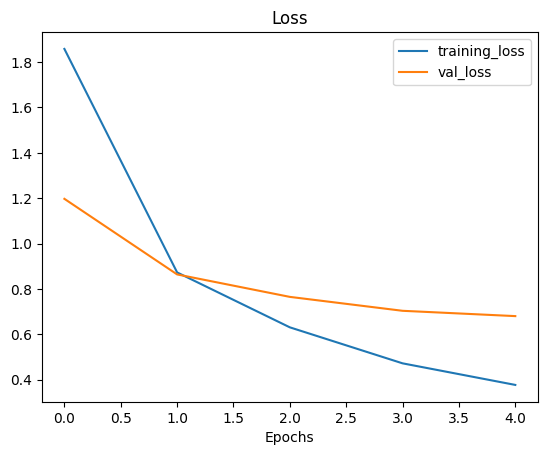

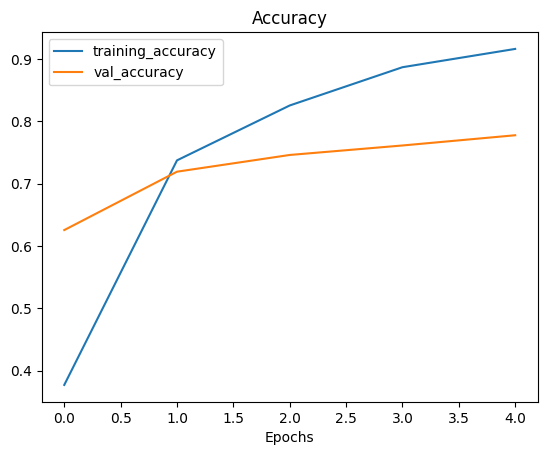

In [ ]:
plot_loss_curves(resnet_history)

* Doğrulama kaybı, eğitim kadar hızlı düşmüyor.
* Model aşırı uymuş olabilir.
* Eğitim kayıpları azalırken doğrulama kaybı artmış.


In [ ]:
# Resnet summary
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (  (None, 2048)              23564800  
 KerasLayer)                                                     
                                                                 
 output_layer (Dense)        (None, 10)                20490     
                                                                 
Total params: 23585290 (89.97 MB)
Trainable params: 20490 (80.04 KB)
Non-trainable params: 23564800 (89.89 MB)
_________________________________________________________________


Tek eğitilebilir parametre çıktı katmanıdır. Yani eğitilecek tek kalıp çıktı katmanımız, çünkü eğitilebilir bir şekilde ayarladık.



TensorFlow Hub'ın gücünü buradan görebilirsiniz. Özellik çıkarma katmanı, modelin ImageNet veri kümesinde zaten öğrendiği önceden öğrenilmiş desenler olan 23.564.800 parametreye sahiptir. Eğitilebilir=Yanlış'ı ayarladığımız için, bu kalıplar eğitim sırasında donmuş (eğitilemez) kalır.

Bu, eğitim sırasında modelin veri kümemize uyacak şekilde çıkış katmanındaki 20.490 parametreyi güncellediği anlamına gelir.

Tamam, bir ResNetV250 modelini eğittik, EfficientNetB0 modeli ile aynısını yapma zamanı geldi.

Create_model() işlevindeki model_url parametresi ve create_tensorboard_callback() işlevindeki experiment_name parametresi dışında, kurulum öncekiyle tamamen aynı olacaktır.

In [ ]:
# Create model
efficientnet_model = create_model(model_url=efficientnet_url, # use EfficientNetB0 TensorFlow Hub URL
                                  num_classes=train_data_10_percent.num_classes)

# Compile EfficientNet model
efficientnet_model.compile(loss='categorical_crossentropy',
                           optimizer=tf.keras.optimizers.Adam(),
                           metrics=['accuracy'])

# Fit EfficientNet model
efficientnet_history = efficientnet_model.fit(train_data_10_percent, # only use 10% of training data
                                              epochs=5, # train for 5 epochs
                                              steps_per_epoch=len(train_data_10_percent),
                                              validation_data=test_data,
                                              validation_steps=len(test_data),
                                              callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub",
                                                                                     # Track logs under different experiment name
                                                                                     experiment_name="efficientnetB0")])



Saving TensorBoard log files to: tensorflow_hub/efficientnetB0/20240408-190704
Epoch 1/5
24/24 [==============================] - 23s 542ms/step - loss: 1.9373 - accuracy: 0.3973 - val_loss: 1.3538 - val_accuracy: 0.7208
Epoch 2/5
24/24 [==============================] - 12s 499ms/step - loss: 1.1029 - accuracy: 0.7587 - val_loss: 0.8870 - val_accuracy: 0.8156
Epoch 3/5
24/24 [==============================] - 11s 463ms/step - loss: 0.7747 - accuracy: 0.8320 - val_loss: 0.7068 - val_accuracy: 0.8412
Epoch 4/5
24/24 [==============================] - 10s 448ms/step - loss: 0.6184 - accuracy: 0.8680 - val_loss: 0.6155 - val_accuracy: 0.8536
Epoch 5/5
24/24 [==============================] - 10s 412ms/step - loss: 0.5233 - accuracy: 0.8960 - val_loss: 0.5591 - val_accuracy: 0.8620


Vay canına! EfficientNetB0 modeli, ResNetV250 modelinden bile daha iyi! Test setinde %85'in üzerinde doğruluk elde etmek... yine eğitim verilerinin yalnızca %10'u ile.

Bu ne kadar havalı?

Birkaç satır kodla son teknoloji modellerden yararlanabiliyor ve bunları kendi kullanım durumumuza göre ayarlayabiliyoruz.

Kayıp eğrilerini kontrol edelim.

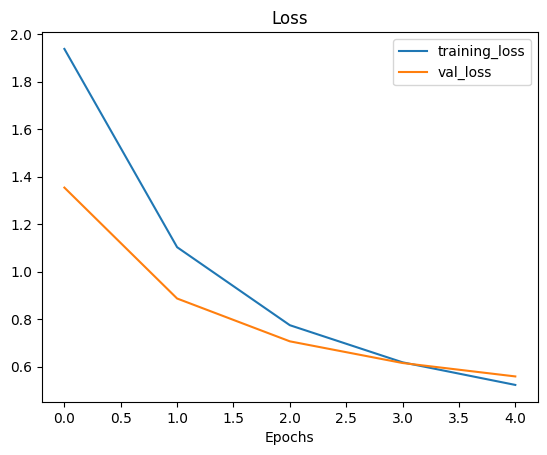

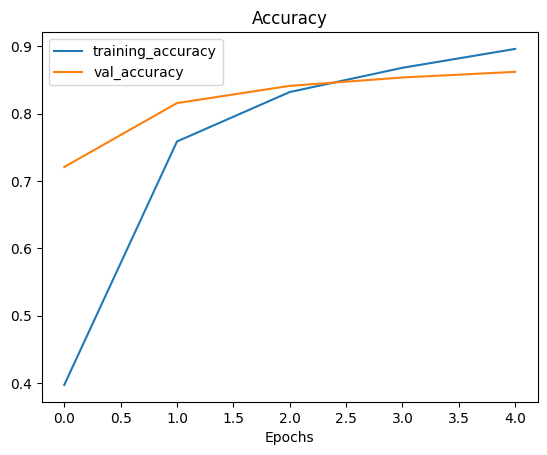

In [ ]:
plot_loss_curves(efficientnet_history)

EfficientNetB0 modelinin kayıp eğrilerinin görünümünden, modelimizi daha uzun süre eğitmeye devam edersek daha da gelişebilir gibi görünüyor. Belki de bu denemek isteyebileceğiniz bir şeydir?

Model özetine göz atalım.

In [ ]:
efficientnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (  (None, 1280)              4049564   
 KerasLayer)                                                     
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4062374 (15.50 MB)
Trainable params: 12810 (50.04 KB)
Non-trainable params: 4049564 (15.45 MB)
_________________________________________________________________


ResNet50V2 çıkarma katmanından dört kat daha az parametreye (4.049.564'e karşı 23.564.800) sahip olmasına rağmen, EfficientNetB0 özelliği çıkarma katmanı daha iyi performans sağlar. Şimdi "verimli" ismin nereden geldiği belli.

Callback ile model eğitim günlüklerimiz otomatik olarak izlendi.

Tensorboard: Ulaşım, makine öğrenimi modellerinizi, performansınızı ve dahili bilgilerinizi görsel olarak keşfetmenin bir yoludur ve TensorBoard.dev'de makine öğrenimi deneylerinizi barındırabilir, takip edebilir ve paylaşabilirsiniz. Ayrıca TensorBoard websiteleri ile entegre olabilir.

# TensorBoard kullanarak modelleri karşılaştırma

Pekala, doğruluk puanlarına bakarak iki modelimizin performansını zaten karşılaştırmış olsak da. Peki ya ikiden fazla modeliniz olsaydı?

TensorBoard (Google Colab'a önceden yüklenmiş) gibi bir deney izleme aracının devreye girdiği yer burasıdır. https://www.tensorflow.org/tensorboard?hl=tr

İşin iyi yanı, bir TensorBoard geri araması kurduğumuz için, modelimizin tüm eğitim günlükleri otomatik olarak kaydedilmiştir. Bunları görselleştirmek için sonuçları TensorBoard.dev'e yükleyebiliriz. https://tensorboard.dev/

Sonuçlarınızı TensorBoard.dev'e yüklemek, birden fazla farklı modelleme deneyini izlemenizi ve paylaşmanızı sağlar. Bu nedenle, birine sonuçlarınızı göstermeniz gerekiyorsa, ona TensorBoard.dev'inizin yanı sıra beraberindeki Colab not defterine bir bağlantı gönderebilirsiniz.

🔑 Not: Bu deneyler halka açıktır, hassas veri yüklemeyin. Gerekirse deneyleri silebilirsiniz.

# Deneyleri TensorBoard'a yükleme

TensorBoard'a bir dizi TensorFlow günlüğü yüklemek için aşağıdaki komutu kullanabiliriz:

Upload TensorBoard dev records

!tensorboard dev upload --logdir ./tensorflow_hub/ \

  --name "EfficientNetB0 vs. ResNet50V2" \

  --description "Comparing two different TF Hub feature extraction models architectures using 10% of training images" \

  --one_shot

  Nerede:

* --Logdir hedef yükleme dizinidir

* --Name deneyin adıdır

* --Açıklama deneyin kısa bir açıklamasıdır

* --One_shot, yükleme bittiğinde TensorBoard yükleyiciden çıkar

Tensorboard dev upload komutunu çalıştırmak, önce sizden TensorBoard.dev'e yüklemeyi yetkilendirmenizi isteyecektir. Yüklemeyi onayladıktan sonra günlük dosyalarınız yüklenecektir.

one_shot ile dosyaları yüklemeyi bitirdikten sonra, bir sefer yükleyiciden çıkarır.

Dosyalar alanında tensorboard oluşturuluyor tarih-sıralama ismi ile.

In [ ]:
# Upload TensorBoard dev records
!tensorboard dev upload --logdir ./tensorflow_hub/ \
  --name "EfficientNetB0 vs. ResNet50V2" \
  --description "Comparing two different TF Hub feature extraction models architectures using 10% of training images" \
  --one_shot

2024-04-08 19:16:42.185329: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-08 19:16:42.185394: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-08 19:16:42.186816: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-08 19:16:43.213665: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
****************************************************************
****************************************************************
****************************************************************

Uploading TensorBoard logs to https://tensorb

TensorBoad.dev'e her bir şey yüklediğinizde yeni bir deney kimliği alacaksınız. Deney kimliği şöyle görünecektir: https://tensorboard.dev/experiment/73taSKxXQeGPQsNBcVvY3g/ (bu, bu not defterindeki gerçek deneydir). https://tensorboard.dev/

Aynı dizini tekrar yüklerseniz, onunla birlikte gitmek için yeni bir deney kimliği alırsınız.

Bu, deneylerinizi izlemek anlamına gelir, yüklemelerinizi nasıl adlandırdığınıza bakmak isteyebilirsiniz. Bu şekilde onları TensorBoard.dev'de bulduğunuzda, her deney sırasında ne olduğunu anlayabilirsiniz (örn. "efficientnet0_10_percent_data").

# TensorBoard'a kaydettiğiniz deneyleri listeleme

Yüklediğiniz tüm deneyleri görmek için şu komutu kullanabilirsiniz:

Tensorboard geliştirme listesi

In [ ]:
# Check out experiments
!tensorboard dev list # uncomment to see


2024-04-08 19:20:36.377368: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-08 19:20:36.377421: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-08 19:20:36.378639: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-08 19:20:37.339925: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

***** TensorBoard.dev Uploader *****

This will list all experiments that you've uploaded to
https://tensorboard.dev. TensorBoard.dev experiments are visible
to everyone. Do not upload sensitive data.

Your use of this service is subject to

In [ ]:
yes

# TensorBoard'dan deneyleri silme

Unutmayın, TensorBoard.dev'e yapılan tüm yüklemeler herkese açıktır, bu nedenle bir denemeyi silmek için şu komutu kullanabilirsiniz:

Tensorboard dev delete --experiment_id [INSERT_EXPERIMENT_ID]

In [ ]:
# Delete an experiment
!tensorboard dev delete --experiment_id n6kd8XZ3Rdy1jSgSLH5WjA

In [ ]:
# Check to see if experiments still exist
!tensorboard dev list # uncomment to see

# 🛠Alıştırmalar

1. Burada sahip olduğumuz aynı verileri kullanarak bir model oluşturun ve sığdırın, ancak TensorFlow Hub'dan MobileNetV2 mimarisi özellik çıkarma (mobilenet_v2_100_224/feature_vector) ile diğer modellerimize kıyasla nasıl performans gösteriyor? https://www.kaggle.com/models/google/mobilenet-v2/frameworks/tensorFlow2/variations/100-224-feature-vector/versions/1?tfhub-redirect=true

2. TensorFlow Hub'da kullanmadığımız 3 farklı görüntü sınıflandırma modelini adlandırın.

3. Fotoğrafını çektiğiniz iki farklı şeyin görüntülerini sınıflandırmak için bir model oluşturun.

  * Bunun için TensorFlow Hub'dan beğendiğiniz herhangi bir özellik çıkarma katmanını kullanabilirsiniz.

  * Her sınıftan en az 10 görüntüye sahip olmayı hedeflemelisiniz, örneğin bir buzdolabı ve fırın sınıflandırıcı oluşturmak için 10 buzdolabı görüntüsü ve 10 fırın görüntüsü isteyeceksiniz.

4. ImageNet'te mevcut en iyi performans gösteren model nedir?

  * İpucu: bunun için sotabench.com'u kontrol etmek isteyebilirsiniz. https://www.sotabench.com/

# 📖 Müfredat dışı

* TensorFlow Transfer Öğrenme Kılavuzunu okuyun ve ana iki transfer öğrenme türünü kendi kelimelerinizle tanımlayın.  https://www.tensorflow.org/tutorials/images/transfer_learning?hl=tr

* TensorFlow web sitesindeki TensorFlow Hub ile Transfer Learning öğreticisini gözden geçirin ve tüm kodu kendiniz yeni bir Google Colab not defterine yeniden yazın ve her adımın yol boyunca ne yaptığı hakkında yorumlar yapın.  https://www.tensorflow.org/tutorials/images/transfer_learning_with_hub?hl=tr

* Bu dizüstü bilgisayarda TensorFlow Hub ile ince ayar yapmadık, ancak daha fazla bilgi edinmek istiyorsanız, TensorFlow ana sayfasında bir TensorFlow Hub modeli öğreticisini ince ayarlayın. Bir tensorflow hub modeli nasıl ince ayar yapılır:  https://www.tensorflow.org/hub/tf2_saved_model?hl=tr#fine-tuning

* Weights & Biases ile deney takibine bakın, bunu mevcut TensorBoard günlüklerimizle nasıl entegre edebilirsiniz?  https://wandb.ai/site/experiment-tracking

https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/04_transfer_learning_in_tensorflow_part_1_feature_extraction.ipynb